# Imports

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pylab as plt
import folium
from folium import Choropleth
#from datetime import datetime

# Postal Code [1]

### Cleaning Postal Code

In [ ]:
postal_boundaries = gpd.read_file('ONldu.shp')
#postal_boundaries.head()

In [ ]:
to_postal_boundaries = postal_boundaries.copy()
to_postal_boundaries = to_postal_boundaries.to_crs(epsg=2957)
to_postal_boundaries = to_postal_boundaries[to_postal_boundaries['POSTALCODE'].str[0] == 'M']
to_postal_boundaries['3L Postal Code'] = to_postal_boundaries['POSTALCODE'].str[0:3]
to_postal_boundaries = to_postal_boundaries[['POSTALCODE','3L Postal Code','geometry']]
to_postal_boundaries.head()

,POSTALCODE,3L Postal Code,geometry
182147,M1B0A1,M1B,"POLYGON ((2573570.360 5182897.340, 2573538.622..."
182154,M1B0A2,M1B,"POLYGON ((2573468.211 5185923.149, 2573453.910..."
182159,M1B0A3,M1B,"POLYGON ((2580080.393 5185653.747, 2580066.983..."
182166,M1B0A3,M1B,"POLYGON ((2580035.452 5185747.584, 2580055.010..."
182172,M1B0A4,M1B,"POLYGON ((2580056.189 5185763.038, 2580035.452..."


In [ ]:
from shapely.ops import unary_union

three_letter_pc = []
geometry = []

for pc in pd.unique(to_postal_boundaries['3L Postal Code']):
    three_letter_pc.append(pc)
    geometry.append(unary_union(to_postal_boundaries[to_postal_boundaries['3L Postal Code']==pc]['geometry']))

three_letter_postal_boundaries = gpd.GeoDataFrame({'three_letter_pc': three_letter_pc, 'geometry': geometry})
three_letter_postal_boundaries.crs = "EPSG:2957"
three_letter_postal_boundaries.head()

,three_letter_pc,geometry
0,M1B,"MULTIPOLYGON (((2573478.556 5183018.874, 25734..."
1,M1C,"MULTIPOLYGON (((2577398.285 5183358.566, 25773..."
2,M1E,"MULTIPOLYGON (((2557649.519 5162469.693, 25576..."
3,M1G,"MULTIPOLYGON (((2574948.387 5180881.153, 25749..."
4,M1H,"MULTIPOLYGON (((2573492.408 5179906.718, 25734..."


# Energy [2]

In [ ]:
building_energy = pd.read_excel('ewrb_odc_data_prep_2022_updated_sept_28_2023.xlsx')
building_energy.head()

,EWRB_ID,City,Postal_Code,PrimPropTypCalc,PrimPropTypSelf,Largest_PropTyp,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date
0,100037,Hawkesbury,K6A,Retail Store,Strip Mall,Retail Store,Retail Store,Not Available,0.612251,15.8,...,1.012927,26.14,1.603478,41.38,22.604213,2.1,Not Available,Not Available,Yes,2022-06-28
1,100066,Rockland,K4K,Strip Mall,Strip Mall,Strip Mall,Strip Mall,Not Available,0.705251,18.2,...,1.315178,33.94,1.997567,51.55,30.138951,2.8,Not Available,Not Available,No,Not Available
2,100088,Cornwall,K6H,Convention Center,Convention Center,Convention Center,"Convention Center, Parking",Not Available,0.670376,17.3,...,1.054002,27.2,1.699966,43.87,23.680604,2.2,Not Available,Not Available,No,Not Available
3,100099,Cornwall,K6H,Multifamily Housing,Multifamily Housing,Multifamily Housing,"Multifamily Housing, Parking",Not Available,0.441751,11.4,...,0.566526,14.62,0.991615,25.59,9.687520,0.9,60,Not Available,No,Not Available
4,100101,Cornwall,K6H,Strip Mall,Strip Mall,Strip Mall,Strip Mall,Matt Morris P. Eng.,0.2325,6,...,0.792827,20.46,1.021065,26.35,26.909778,2.5,Not Available,Not Available,Yes,2022-06-30


In [ ]:
building_energy_filt = building_energy[['City','Postal_Code','PrimPropTypCalc','WN_Sit_Elc_Int1','WN_Sit_Gas_Int1','GHG_Emiss_Int1','Ener_Star_Score']]
building_energy_filt = building_energy_filt[building_energy_filt['Postal_Code'].str[0]=='M']
building_energy_filt.reset_index(inplace=True, drop=True)
building_energy_filt.head()
# 1411 entries

,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score
0,Toronto,M1N,Multifamily Housing,0.368126,0.113538,9.687520,74
1,Scarborough,M1L,Multifamily Housing,0.406876,0.340613,18.298649,39
2,Toronto,M1L,Multifamily Housing,0.259626,0.681226,33.368124,46
3,Toronto,M1L,Multifamily Housing,0.387501,0.340613,17.222258,53
4,Toronto,M1L,Multifamily Housing,0.383626,0.340613,19.375040,23


# Age [3]

### Age specific postal code readfile - or else loose resolution (keeping 6 - letters)

In [ ]:
df_postal_gpd = postal_boundaries.copy()
df_postal_gpd = df_postal_gpd.to_crs(epsg=2957)
# df_postal_gpd = to_postal_boundaries[to_postal_boundaries['POSTALCODE'].str[0] == 'M']


In [ ]:
#df_postal_gpd = gpd.read_file('ONldu.shp')

In [ ]:
# Converting to crs with epsg=2957 (Toronto's EPSG)
#df_postal_gpd.crs = "EPSG:2957"

In [ ]:
# Data Cleaning
df_postal_gpd_2957 = df_postal_gpd[['POSTALCODE', 'geometry']]
filt_df_postal_2957 = df_postal_gpd_2957[df_postal_gpd_2957['POSTALCODE'].str[:1] == 'M']
filt_df_postal_2957 = filt_df_postal_2957.reset_index(drop=True)
filt_df_postal_2957.head()

,POSTALCODE,geometry
0,M1B0A1,"POLYGON ((2573570.360 5182897.340, 2573538.622..."
1,M1B0A2,"POLYGON ((2573468.211 5185923.149, 2573453.910..."
2,M1B0A3,"POLYGON ((2580080.393 5185653.747, 2580066.983..."
3,M1B0A3,"POLYGON ((2580035.452 5185747.584, 2580055.010..."
4,M1B0A4,"POLYGON ((2580056.189 5185763.038, 2580035.452..."


### Cleaning Age

In [ ]:
# Reading the 'Property_Boundaries_Construction_Date.shp' (age) shape file with Geopandas
df_age = gpd.read_file('Property_Boundaries_Construction_Date.shp')

In [ ]:
# Converting to crs with epsg=2957 (Toronto's EPSG)
df_age_2957 = df_age.to_crs(epsg=2957)

In [ ]:
# Data Cleaning
df_age_2957 = df_age_2957[['Class_name', 'geometry']] #selecting only Class_name and geometry columns and omitting rest
df_age_2957['area'] = df_age_2957.geometry.area #calculating the area of each geometry --> which is building area
filt_df_age_2957 = df_age_2957[df_age_2957['Class_name'] != 'Roads'] #dropping the rows where the Class_name is Roads as those are not buildings

In [ ]:
filt_df_age_2957.head()

,Class_name,geometry,area
1,1976-2003,"POLYGON ((2546344.999 5169843.548, 2546339.401...",579.610678
2,1946-1960,"POLYGON ((2547463.112 5170251.720, 2547484.216...",707.126233
3,1976-2003,"POLYGON ((2546307.623 5169832.813, 2546305.700...",319.792424
4,1976-2003,"POLYGON ((2546268.960 5169857.275, 2546270.777...",391.933523
5,1976-2003,"POLYGON ((2546296.854 5169866.470, 2546300.893...",319.455527


### Merging Age

In [ ]:
# Merging the cleaned age dataframe with the postal code data on the geometery
joined_df_postal_age = gpd.sjoin(filt_df_age_2957, three_letter_postal_boundaries, how="left", predicate="intersects")
joined_df_postal_age.head()

,Class_name,geometry,area,index_right,three_letter_pc
1,1976-2003,"POLYGON ((2546344.999 5169843.548, 2546339.401...",579.610678,98.0,M9V
2,1946-1960,"POLYGON ((2547463.112 5170251.720, 2547484.216...",707.126233,93.0,M9L
3,1976-2003,"POLYGON ((2546307.623 5169832.813, 2546305.700...",319.792424,98.0,M9V
4,1976-2003,"POLYGON ((2546268.960 5169857.275, 2546270.777...",391.933523,98.0,M9V
5,1976-2003,"POLYGON ((2546296.854 5169866.470, 2546300.893...",319.455527,98.0,M9V


In [ ]:
joined_df_postal_age_backup = joined_df_postal_age.copy()

In [ ]:
# run this if need to use backup (faster than reading file again)
joined_df_postal_age = joined_df_postal_age_backup

In [ ]:
# May come back to this later to deal with NaN values
joined_df_postal_age[joined_df_postal_age['three_letter_pc'].isnull()]

# noticed this doesn't do anything (result is not assigned to any variable) - not sure if that's fine

,Class_name,geometry,area,index_right,three_letter_pc
53262,1976-2003,"POLYGON ((2572371.928 5186607.832, 2572233.572...",37256.692820,NaN,NaN
58084,1931-1945,"POLYGON ((2557475.315 5160858.263, 2557490.228...",105.780968,NaN,NaN
60699,1976-2003,"POLYGON ((2574317.702 5182279.510, 2574323.049...",954.213052,NaN,NaN
61978,1976-2003,"POLYGON ((2556197.746 5159268.738, 2556197.521...",3218.812813,NaN,NaN
68723,1976-2003,"POLYGON ((2557954.669 5158026.568, 2557957.272...",100.050002,NaN,NaN
...,...,...,...,...,...
523908,1946-1960,"POLYGON ((2556248.579 5171731.599, 2556234.869...",406.258600,NaN,NaN
524126,1946-1960,"POLYGON ((2569164.960 5164585.679, 2569162.317...",2028.702269,NaN,NaN
525978,1976-2003,"POLYGON ((2569183.876 5164673.156, 2569184.014...",646.164087,NaN,NaN
526377,1961-1975,"POLYGON ((2558213.880 5166260.436, 2558216.649...",3887.845262,NaN,NaN


In [ ]:
# Truncating the postal code to 3 letters to work with other datasets
#joined_df_postal_age['POSTALCODE'] = joined_df_postal_age['POSTALCODE'].str[:3].astype(str) #truncating to first 3 letters and making sure it is a string
#joined_df_postal_age.head()

In [ ]:
# Grouping Data - Assigning age group per 3 letter postal code

# Assigning integers for each class_name through creating a dictionary
class_name_mapping = {
    'Pre-1901': 0,
    '1901-1915': 1,
    '1916-1930': 2,
    '1931-1945': 3,
    '1946-1960': 4,
    '1961-1975': 5,
    '1976-2003': 6
}

In [ ]:
# With the above defined dictionary, we need to map every Class_name to an integer in the column 'Class_name_int'
joined_df_postal_age['Class_name_int'] = joined_df_postal_age['Class_name'].map(class_name_mapping)
joined_df_postal_age.head()

,Class_name,geometry,area,index_right,three_letter_pc,Class_name_int
1,1976-2003,"POLYGON ((2546344.999 5169843.548, 2546339.401...",579.610678,98.0,M9V,6
2,1946-1960,"POLYGON ((2547463.112 5170251.720, 2547484.216...",707.126233,93.0,M9L,4
3,1976-2003,"POLYGON ((2546307.623 5169832.813, 2546305.700...",319.792424,98.0,M9V,6
4,1976-2003,"POLYGON ((2546268.960 5169857.275, 2546270.777...",391.933523,98.0,M9V,6
5,1976-2003,"POLYGON ((2546296.854 5169866.470, 2546300.893...",319.455527,98.0,M9V,6


In [ ]:
# For every 3 letter postal code, there are many buildings with different ages. In order to get one age for one 3
# 3 letter postal code, we will take the weighted average of the ages and the area of the building put into a column
# 'Average_Age_int'
joined_df_postal_age = joined_df_postal_age.groupby('three_letter_pc').apply(lambda group: np.average(group['Class_name_int'], weights=group['area'])).reset_index(name='Average_Age_int')
joined_df_postal_age.head()

,three_letter_pc,Average_Age_int
0,M1B,4.862948
1,M1C,4.839976
2,M1E,4.616922
3,M1G,4.583526
4,M1H,4.761931


In [ ]:
# After getting the weighted average, only care about the first digit of the average as the digit signifies
# an age group, put the first digit into a column 'Average_Age' and convert that digit into a string
#joined_df_postal_age['Average_Age'] = joined_df_postal_age['Average_Age_int'].astype(str).str[0].astype(int)

joined_df_postal_age['Average_Age'] = joined_df_postal_age['Average_Age_int'].round()
joined_df_postal_age.head()

#### Change this to round

,three_letter_pc,Average_Age_int,Average_Age
0,M1B,4.862948,5.0
1,M1C,4.839976,5.0
2,M1E,4.616922,5.0
3,M1G,4.583526,5.0
4,M1H,4.761931,5.0


C:\Users\zereb\AppData\Local\Temp\ipykernel_44272\4175864690.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined_df_postal_age['Average_Age_int'])


<Axes: xlabel='Average_Age_int', ylabel='Density'>

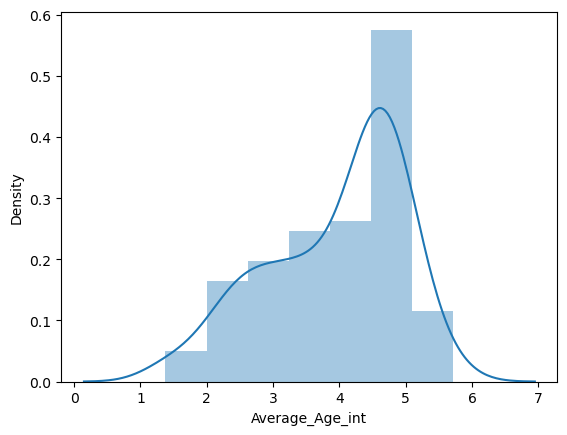

In [ ]:
sns.distplot(joined_df_postal_age['Average_Age_int'])

In [ ]:
# Reversing our first mapping to get back the age range
class_name_reverse_mapping = {
    0: 'Pre-1901',
    1: '1901-1915',
    2: '1916-1930',
    3: '1931-1945',
    4: '1946-1960',
    5: '1961-1975',
    6: '1976-2003'
}

In [ ]:
# Re-assigning the 'Average_Age' column to have age groups using the dictionary class_name_reverse_mapping
joined_df_postal_age['Average_Age'] = joined_df_postal_age['Average_Age'].map(class_name_reverse_mapping)
joined_df_postal_age.head() # Final DF

,three_letter_pc,Average_Age_int,Average_Age
0,M1B,4.862948,1961-1975
1,M1C,4.839976,1961-1975
2,M1E,4.616922,1961-1975
3,M1G,4.583526,1961-1975
4,M1H,4.761931,1961-1975


In [ ]:
joined_df_postal_age['Average_Age'].unique()

array(['1961-1975', '1946-1960', '1976-2003', '1916-1930', '1931-1945',
       '1901-1915'], dtype=object)

# Socioeconomic [4]

### Cleaning Socioeconomic

In [ ]:
# Import postal code to neighbourhood data (just in case needed for analysis/connecting datasets)
postal_code_to_neighbourhood = pd.read_csv('postal_code_to_neighbourhood.csv')
postal_code_to_neighbourhood.head()

# Problem is that these 203 neighbourhoods don't perfectly align with City of Toronto's 158 neighbourhoods
# Need some kind of manual matching or use the City's geospatial data to reason out the postal codes
# Will use City of Toronto's neighbourhood boundaries for now to allow mapping.

,SL. NO.,NEIGHBOURHOOD,POSTAL CODES,DISTRICT
0,1,Adelaide,M5H,Downtown Toronto
1,2,Agincourt North,M1V,Scarborough
2,3,Agincourt,M1S,Scarborough
3,4,Albion Gardens,M9V,Etobicoke
4,5,Alderwood,M8W,Etobicoke


In [ ]:
# Import and reformat City of Toronto neighbourhoods boundaries
neighbourhood_boundaries = gpd.read_file('Neighbourhoods - 4326.shp')
neighbourhood_boundaries = neighbourhood_boundaries.to_crs(epsg=2957)
neighbourhood_boundaries = neighbourhood_boundaries[['AREA_NA7','geometry']]
neighbourhood_boundaries.columns = ['Neighbourhood name','geometry']
neighbourhood_boundaries.index = neighbourhood_boundaries['Neighbourhood name']
neighbourhood_boundaries = neighbourhood_boundaries.drop(['Neighbourhood name'], axis=1)
neighbourhood_boundaries.head()

,geometry
Neighbourhood name,
South Eglinton-Davisville,"POLYGON ((2565070.599 5168519.622, 2565092.460..."
North Toronto,"POLYGON ((2563843.300 5169233.848, 2563775.703..."
Dovercourt Village,"POLYGON ((2562606.657 5163062.843, 2562515.282..."
Junction-Wallace Emerson,"POLYGON ((2561961.324 5163775.072, 2562010.447..."
Yonge-Bay Corridor,"POLYGON ((2567200.520 5162712.468, 2567128.346..."


In [ ]:
# Import and reformat socioeconomic data
neighbourhood_se = pd.read_csv('neighbourhood_profiles_2021.csv')
neighbourhood_se.index = neighbourhood_se['Neighbourhood Name']
neighbourhood_se = neighbourhood_se.drop(['Neighbourhood Name'], axis=1)
neighbourhood_se = neighbourhood_se.transpose()
#neighbourhood_se.head()

In [ ]:
# Keep only average household income for now
neighbourhood_income = neighbourhood_se[['Neighbourhood Number', '  Average total income of household in 2020 ($)']]
neighbourhood_income.columns = ['Neighbourhood number', 'Average household income']
neighbourhood_income.index.rename(name='Neighbourhood name', inplace=True)
neighbourhood_income.head()

,Neighbourhood number,Average household income
Neighbourhood name,,
West Humber-Clairville,1,104500
Mount Olive-Silverstone-Jamestown,2,86200
Thistletown-Beaumond Heights,3,101300
Rexdale-Kipling,4,90000
Elms-Old Rexdale,5,94600


In [ ]:
# Merge neighbourhood boundaries and household income
neighbourhood_data = pd.merge(neighbourhood_income, neighbourhood_boundaries, left_index=True, right_index=True)
neighbourhood_data = gpd.GeoDataFrame(neighbourhood_data)
neighbourhood_data.head()

,Neighbourhood number,Average household income,geometry
Neighbourhood name,,,
West Humber-Clairville,1,104500,"POLYGON ((2547319.617 5167116.279, 2547468.432..."
Mount Olive-Silverstone-Jamestown,2,86200,"POLYGON ((2547174.743 5170537.726, 2547185.808..."
Thistletown-Beaumond Heights,3,101300,"POLYGON ((2549227.257 5168938.985, 2549225.274..."
Rexdale-Kipling,4,90000,"POLYGON ((2550220.195 5165397.414, 2550038.827..."
Elms-Old Rexdale,5,94600,"POLYGON ((2550918.577 5167997.989, 2550958.572..."


### Merging Socioeconomic

In [ ]:
# Merging the cleaned age dataframe with the postal code data on the geometery
joined_df_postal_SE = gpd.sjoin(neighbourhood_data, filt_df_postal_2957, how="left", predicate="intersects")
joined_df_postal_SE.head()

,Neighbourhood number,Average household income,geometry,index_right,POSTALCODE
Neighbourhood name,,,,,
West Humber-Clairville,1,104500,"POLYGON ((2547319.617 5167116.279, 2547468.432...",51565,M9W6Z9
West Humber-Clairville,1,104500,"POLYGON ((2547319.617 5167116.279, 2547468.432...",51246,M9W5E4
West Humber-Clairville,1,104500,"POLYGON ((2547319.617 5167116.279, 2547468.432...",51566,M9W7A1
West Humber-Clairville,1,104500,"POLYGON ((2547319.617 5167116.279, 2547468.432...",51247,M9W5E5
West Humber-Clairville,1,104500,"POLYGON ((2547319.617 5167116.279, 2547468.432...",51248,M9W5E6


In [ ]:
joined_df_postal_SE = gpd.sjoin(neighbourhood_data, three_letter_postal_boundaries, how="left", predicate="intersects")
joined_df_postal_SE.head()

,Neighbourhood number,Average household income,geometry,index_right,three_letter_pc
Neighbourhood name,,,,,
West Humber-Clairville,1,104500,"POLYGON ((2547319.617 5167116.279, 2547468.432...",99,M9W
West Humber-Clairville,1,104500,"POLYGON ((2547319.617 5167116.279, 2547468.432...",98,M9V
Mount Olive-Silverstone-Jamestown,2,86200,"POLYGON ((2547174.743 5170537.726, 2547185.808...",98,M9V
Thistletown-Beaumond Heights,3,101300,"POLYGON ((2549227.257 5168938.985, 2549225.274...",98,M9V
Thistletown-Beaumond Heights,3,101300,"POLYGON ((2549227.257 5168938.985, 2549225.274...",94,M9M


In [ ]:
_overlay = gpd.overlay(neighbourhood_data, three_letter_postal_boundaries, how="intersection")

In [ ]:
_overlay['area'] = _overlay.geometry.area

C:\Users\zereb\AppData\Local\Temp\ipykernel_44272\3969169598.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(_overlay['area'])


<Axes: xlabel='area', ylabel='Density'>

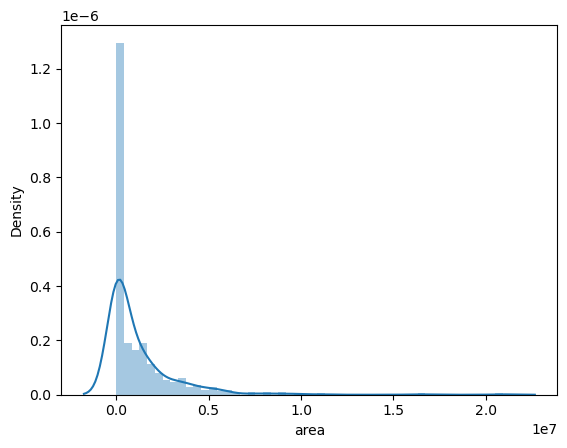

In [ ]:
sns.distplot(_overlay['area'])

<Axes: >

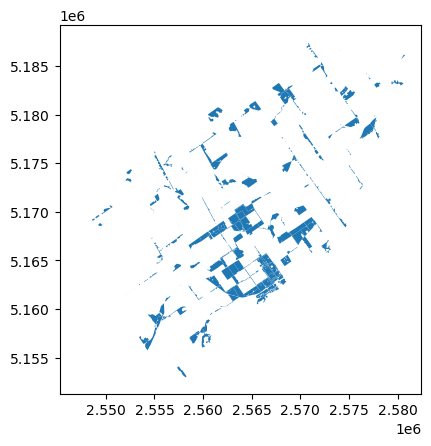

In [ ]:
_overlay[_overlay['area']< 1e6]['geometry'].plot()

<Axes: >

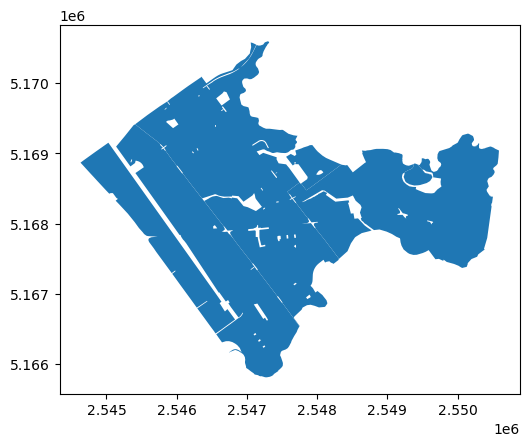

In [ ]:
_overlay[_overlay['three_letter_pc']=='M9V']['geometry'].plot()

In [ ]:
m9v = _overlay[_overlay['three_letter_pc']=='M9V']

In [ ]:
_overlay['Average household income'] = _overlay['Average household income'].astype(int)

In [ ]:
_overlay.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Neighbourhood number      513 non-null    object  
 1   Average household income  513 non-null    int32   
 2   three_letter_pc           513 non-null    object  
 3   geometry                  513 non-null    geometry
 4   area                      513 non-null    float64 
dtypes: float64(1), geometry(1), int32(1), object(2)
memory usage: 18.2+ KB


In [ ]:
postal_code_socioeconomics = _overlay.groupby('three_letter_pc').apply(lambda group: np.average(group['Average household income'], weights=group['area'])).reset_index(name='Average_Household_Income')

In [ ]:
postal_code_socioeconomics.head()

,three_letter_pc,Average_Household_Income
0,M1B,115616.248665
1,M1C,140535.461835
2,M1E,99073.469141
3,M1G,91658.256232
4,M1H,87146.443373


# Solar Potential [5]

In [ ]:
solar_data = gpd.read_file('solarto-map - 4326.shp', SHAPE_RESTORE_SHX = 'YES')
solar_data_2957 = solar_data.to_crs(epsg=2957)
solar_data_2957.head()

,_id1,objecti2,structu3,roofsiz4,rooftop5,roof_si6,annual_7,system_8,system_9,first_y10,f_25_ye11,payback12,annual_13,total_g14,trees_g15,cars_of16,geometry
0,1,1,38 Westleigh Cres - Structure 1,117.0,1259.0,44.0,5627,4.893043,14700,881,39262,10.0,394,9847,164,2,"POLYGON ((2555348.668 5152952.976, 2555340.241..."
1,2,2,36 Westleigh Cres - Structure 1,101.0,1087.0,51.0,6012,5.227826,14100,941,41936,9.0,421,10521,175,2,"POLYGON ((2555329.515 5152962.112, 2555325.746..."
2,3,3,34 Westleigh Cres - Structure 1,74.0,797.0,32.0,4061,3.531304,10600,636,28343,10.0,284,7107,118,2,"POLYGON ((2555333.993 5152991.670, 2555342.687..."
3,4,4,34 Westleigh Cres - Structure 2,42.0,452.0,12.0,1480,1.286957,3900,232,10339,10.0,104,2590,43,1,"POLYGON ((2555332.030 5152976.610, 2555330.020..."
4,5,5,40 Westleigh Cres - Structure 1,79.0,850.0,14.0,1775,1.543478,4600,278,12389,10.0,124,3106,52,1,"POLYGON ((2555355.296 5152950.505, 2555364.931..."


In [ ]:
# Define old to new column names
column_selection = {
    'structu3': 'Street',
    'roofsiz4': 'Roof_size',
    'annual_7': 'Annual_electricity_generation_k',
    'system_8': 'System_size',
    'system_9': 'System_cost',
    'first_y10': '1_year_bill_savings',
    'f_25_ye11': '25_year_bill_savings',
    'payback12': 'Payback_period',
    'annual_13': 'Annual_ghg_reduction_kg',
    'geometry': 'Geometry'
}

# Select and rename columns in one step, creating the final DataFrame
solar_final = solar_data_2957.rename(columns=column_selection)[list(column_selection.values())]

# Display the first few rows of the subsetted data to verify
solar_final.head()


,Street,Roof_size,Annual_electricity_generation_k,System_size,System_cost,1_year_bill_savings,25_year_bill_savings,Payback_period,Annual_ghg_reduction_kg,Geometry
0,38 Westleigh Cres - Structure 1,117.0,5627,4.893043,14700,881,39262,10.0,394,"POLYGON ((2555348.668 5152952.976, 2555340.241..."
1,36 Westleigh Cres - Structure 1,101.0,6012,5.227826,14100,941,41936,9.0,421,"POLYGON ((2555329.515 5152962.112, 2555325.746..."
2,34 Westleigh Cres - Structure 1,74.0,4061,3.531304,10600,636,28343,10.0,284,"POLYGON ((2555333.993 5152991.670, 2555342.687..."
3,34 Westleigh Cres - Structure 2,42.0,1480,1.286957,3900,232,10339,10.0,104,"POLYGON ((2555332.030 5152976.610, 2555330.020..."
4,40 Westleigh Cres - Structure 1,79.0,1775,1.543478,4600,278,12389,10.0,124,"POLYGON ((2555355.296 5152950.505, 2555364.931..."


In [ ]:
print('Missingness before modification:')
print(solar_final.isnull().sum())

Missingness before modification:
Street                             0
Roof_size                          0
Annual_electricity_generation_k    0
System_size                        0
System_cost                        0
1_year_bill_savings                0
25_year_bill_savings               0
Payback_period                     0
Annual_ghg_reduction_kg            0
Geometry                           0
dtype: int64


### Solar potential specific postal code readfile - or else loose resolution (keeping 6 - letters)

In [ ]:
df_postal_gpd.head()

,PCA_ID,POSTALCODE,PROV,MAF_ID,PREC_CODE,PCA_COUNT,DOM_PCA,MULTI_PC,DEL_M_ID,LONGITUDE,LATITUDE,geometry
0,180000001,L4S1M4,ON,350005325,2,2,0,0,SS0315,-79.415566,43.894633,"POLYGON ((2555492.847 5189600.571, 2555498.935..."
1,180000002,K1Y3R6,ON,350002120,2,1,1,0,LC0011,-75.721267,45.398581,"POLYGON ((2786162.707 5462032.505, 2786157.722..."
2,180000003,L4S1M5,ON,350005325,2,1,1,0,SS0315,-79.401105,43.900182,"POLYGON ((2556767.252 5190821.386, 2556791.926..."
3,180000004,L4S1M6,ON,350005325,2,1,1,0,None,-79.389156,43.901523,"POLYGON ((2557385.063 5190891.433, 2557344.269..."
4,180000005,L4S1M7,ON,350005325,2,3,0,0,SS0315,-79.415879,43.892396,"POLYGON ((2555548.700 5189450.056, 2555553.669..."


In [ ]:
postal_data_2957 = df_postal_gpd.to_crs(epsg=2957)
postal_data_2957.head()

,PCA_ID,POSTALCODE,PROV,MAF_ID,PREC_CODE,PCA_COUNT,DOM_PCA,MULTI_PC,DEL_M_ID,LONGITUDE,LATITUDE,geometry
0,180000001,L4S1M4,ON,350005325,2,2,0,0,SS0315,-79.415566,43.894633,"POLYGON ((2555492.847 5189600.571, 2555498.935..."
1,180000002,K1Y3R6,ON,350002120,2,1,1,0,LC0011,-75.721267,45.398581,"POLYGON ((2786162.707 5462032.505, 2786157.722..."
2,180000003,L4S1M5,ON,350005325,2,1,1,0,SS0315,-79.401105,43.900182,"POLYGON ((2556767.252 5190821.386, 2556791.926..."
3,180000004,L4S1M6,ON,350005325,2,1,1,0,None,-79.389156,43.901523,"POLYGON ((2557385.063 5190891.433, 2557344.269..."
4,180000005,L4S1M7,ON,350005325,2,3,0,0,SS0315,-79.415879,43.892396,"POLYGON ((2555548.700 5189450.056, 2555553.669..."


In [ ]:
# Define old to new column names
postal_data_2957 = postal_data_2957[['POSTALCODE', 'geometry']].rename(columns={
    'POSTALCODE': 'Postal_code',
    'geometry': 'Geometry'
})

postal_data_2957.head()

,Postal_code,Geometry
0,L4S1M4,"POLYGON ((2555492.847 5189600.571, 2555498.935..."
1,K1Y3R6,"POLYGON ((2786162.707 5462032.505, 2786157.722..."
2,L4S1M5,"POLYGON ((2556767.252 5190821.386, 2556791.926..."
3,L4S1M6,"POLYGON ((2557385.063 5190891.433, 2557344.269..."
4,L4S1M7,"POLYGON ((2555548.700 5189450.056, 2555553.669..."


In [ ]:
# Assuming 'Geometry' is the geometry column in postal_data_2957
postal_data_2957 = postal_data_2957.set_geometry('Geometry')
solar_final = solar_final.set_geometry('Geometry')

# Perform spatial join using the 'within' operation
joined_solar = gpd.sjoin(solar_final, postal_data_2957, how='left', predicate='within')
joined_solar.head()

,Street,Roof_size,Annual_electricity_generation_k,System_size,System_cost,1_year_bill_savings,25_year_bill_savings,Payback_period,Annual_ghg_reduction_kg,Geometry,index_right,Postal_code
0,38 Westleigh Cres - Structure 1,117.0,5627,4.893043,14700,881,39262,10.0,394,"POLYGON ((2555348.668 5152952.976, 2555340.241...",369319.0,M8W3Z7
1,36 Westleigh Cres - Structure 1,101.0,6012,5.227826,14100,941,41936,9.0,421,"POLYGON ((2555329.515 5152962.112, 2555325.746...",369319.0,M8W3Z7
2,34 Westleigh Cres - Structure 1,74.0,4061,3.531304,10600,636,28343,10.0,284,"POLYGON ((2555333.993 5152991.670, 2555342.687...",369319.0,M8W3Z7
3,34 Westleigh Cres - Structure 2,42.0,1480,1.286957,3900,232,10339,10.0,104,"POLYGON ((2555332.030 5152976.610, 2555330.020...",369319.0,M8W3Z7
4,40 Westleigh Cres - Structure 1,79.0,1775,1.543478,4600,278,12389,10.0,124,"POLYGON ((2555355.296 5152950.505, 2555364.931...",369319.0,M8W3Z7


In [ ]:
# Assuming 'Geometry' is the geometry column in postal_data_2957
#postal_data_2957 = filt_df_postal_2957.set_geometry('geometry')
solar_final = solar_final.set_geometry('Geometry')

# Perform spatial join using the 'within' operation
joined_solar = gpd.sjoin(solar_final, postal_data_2957, how='left', op='within')
joined_solar.head()

C:\Users\zereb\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,Street,Roof_size,Annual_electricity_generation_k,System_size,System_cost,1_year_bill_savings,25_year_bill_savings,Payback_period,Annual_ghg_reduction_kg,Geometry,index_right,Postal_code
0,38 Westleigh Cres - Structure 1,117.0,5627,4.893043,14700,881,39262,10.0,394,"POLYGON ((2555348.668 5152952.976, 2555340.241...",369319.0,M8W3Z7
1,36 Westleigh Cres - Structure 1,101.0,6012,5.227826,14100,941,41936,9.0,421,"POLYGON ((2555329.515 5152962.112, 2555325.746...",369319.0,M8W3Z7
2,34 Westleigh Cres - Structure 1,74.0,4061,3.531304,10600,636,28343,10.0,284,"POLYGON ((2555333.993 5152991.670, 2555342.687...",369319.0,M8W3Z7
3,34 Westleigh Cres - Structure 2,42.0,1480,1.286957,3900,232,10339,10.0,104,"POLYGON ((2555332.030 5152976.610, 2555330.020...",369319.0,M8W3Z7
4,40 Westleigh Cres - Structure 1,79.0,1775,1.543478,4600,278,12389,10.0,124,"POLYGON ((2555355.296 5152950.505, 2555364.931...",369319.0,M8W3Z7


In [ ]:
# Reorder the columns
columns = list(joined_solar.columns)
columns.insert(columns.index('Roof_size'), columns.pop(columns.index('Postal_code')))
joined_solar = joined_solar[columns]

# Remove the 'index_right' column
joined_solar_final = joined_solar.drop('index_right', axis=1)
joined_solar_final.head()

,Street,Postal_code,Roof_size,Annual_electricity_generation_k,System_size,System_cost,1_year_bill_savings,25_year_bill_savings,Payback_period,Annual_ghg_reduction_kg,Geometry
0,38 Westleigh Cres - Structure 1,M8W3Z7,117.0,5627,4.893043,14700,881,39262,10.0,394,"POLYGON ((2555348.668 5152952.976, 2555340.241..."
1,36 Westleigh Cres - Structure 1,M8W3Z7,101.0,6012,5.227826,14100,941,41936,9.0,421,"POLYGON ((2555329.515 5152962.112, 2555325.746..."
2,34 Westleigh Cres - Structure 1,M8W3Z7,74.0,4061,3.531304,10600,636,28343,10.0,284,"POLYGON ((2555333.993 5152991.670, 2555342.687..."
3,34 Westleigh Cres - Structure 2,M8W3Z7,42.0,1480,1.286957,3900,232,10339,10.0,104,"POLYGON ((2555332.030 5152976.610, 2555330.020..."
4,40 Westleigh Cres - Structure 1,M8W3Z7,79.0,1775,1.543478,4600,278,12389,10.0,124,"POLYGON ((2555355.296 5152950.505, 2555364.931..."


In [ ]:
# Filter columns
filtered = joined_solar_final[['Postal_code', 'Roof_size','Annual_electricity_generation_k', 'Annual_ghg_reduction_kg', 'Geometry']]

# Aggregate by Postal_code and Geometry and sum up the values
aggregated = filtered.groupby(['Postal_code', 'Geometry']).sum().reset_index()
aggregated.head()

,Postal_code,Geometry,Roof_size,Annual_electricity_generation_k,Annual_ghg_reduction_kg
0,L4L1V8,"POLYGON ((2547364.118 5170869.481, 2547346.375...",302.0,22582,1581
1,L4L1V8,"POLYGON ((2547392.768 5170882.054, 2547381.550...",261.0,31322,2193
2,L4L1V8,"POLYGON ((2547376.061 5170907.604, 2547365.712...",185.0,23301,1631
3,L5M0T5,"POLYGON ((2550000.595 5159323.085, 2550000.095...",1434.0,142976,10008
4,L5M0T5,"POLYGON ((2550025.953 5159392.196, 2550027.215...",613.0,58184,4073


In [ ]:
# Group by Postal_code and Geometry, summing up the other columns
grouped = joined_solar_final.groupby(['Postal_code', 'Geometry']).agg({
    'Annual_electricity_generation_k': 'sum',
    'Annual_ghg_reduction_kg': 'sum',
    'Roof_size': 'sum'
}).reset_index()

# Then, group only by Postal_code, summing the grouped values
merged = grouped.groupby('Postal_code').agg({
    'Annual_electricity_generation_k': 'sum',
    'Annual_ghg_reduction_kg': 'sum',
    'Roof_size': 'sum'
}).reset_index()
merged.head()

,Postal_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg,Roof_size
0,L4L1V8,77205,5405,748.0
1,L5M0T5,201160,14081,2047.0
2,M1B0A2,1826520,127856,13176.0
3,M1B0A3,239890,16790,3208.0
4,M1B0A4,8725,611,126.0


In [ ]:
unique_postal = merged['Postal_code'].unique()
print(unique_postal)
total_unique_count = len(unique_postal)
print("Total unique Postal_code values:", total_unique_count)

['L4L1V8' 'L5M0T5' 'M1B0A2' ... 'M9W7K3' 'M9W7K4' 'M9W7K7']
Total unique Postal_code values: 41045


In [ ]:
# Extract the first three letters of the Postal_code column
merged['Abbreviated_Postal_code'] = merged['Postal_code'].str[:3]

# Group by the abbreviated Postal_code and sum the other columns
grouped_abbreviated = merged.groupby('Abbreviated_Postal_code').agg({
    'Annual_electricity_generation_k': 'sum',
    'Annual_ghg_reduction_kg': 'sum',
    'Roof_size': 'sum'
}).reset_index()
grouped_abbreviated['Annual_electricity_generation_kWh/m^2'] = grouped_abbreviated['Annual_electricity_generation_k'] / grouped_abbreviated['Roof_size']
grouped_abbreviated['Annual_energy_generation_GJ/m^2'] = grouped_abbreviated['Annual_electricity_generation_kWh/m^2'] * 0.0036
grouped_abbreviated['Annual_ghg_reduction_kg/m^2'] = grouped_abbreviated['Annual_ghg_reduction_kg'] / grouped_abbreviated['Roof_size']

grouped_abbreviated.head() # Final DF

,Abbreviated_Postal_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg,Roof_size,Annual_electricity_generation_kWh/m^2,Annual_energy_generation_GJ/m^2,Annual_ghg_reduction_kg/m^2
0,L4L,77205,5405,748.0,103.215241,0.371575,7.225936
1,L5M,201160,14081,2047.0,98.270640,0.353774,6.878847
2,M1B,200431782,14030251,2089450.0,95.925618,0.345332,6.714806
3,M1C,129826652,9087895,1764035.0,73.596415,0.264947,5.151766
4,M1E,131712672,9219883,1603833.0,82.123682,0.295645,5.748655


In [ ]:
unique_codes = grouped_abbreviated['Abbreviated_Postal_code'].unique()
print(unique_codes)
total_unique_count = len(unique_codes)
print("Total unique Postal_code values:", total_unique_count)

['L4L' 'L5M' 'M1B' 'M1C' 'M1E' 'M1G' 'M1H' 'M1J' 'M1K' 'M1L' 'M1M' 'M1N'
 'M1P' 'M1R' 'M1S' 'M1T' 'M1V' 'M1W' 'M1X' 'M2H' 'M2J' 'M2K' 'M2L' 'M2M'
 'M2N' 'M2P' 'M2R' 'M3A' 'M3B' 'M3C' 'M3H' 'M3J' 'M3K' 'M3L' 'M3M' 'M3N'
 'M4A' 'M4B' 'M4C' 'M4E' 'M4G' 'M4H' 'M4J' 'M4K' 'M4L' 'M4M' 'M4N' 'M4P'
 'M4R' 'M4S' 'M4T' 'M4V' 'M4W' 'M4X' 'M4Y' 'M5A' 'M5B' 'M5C' 'M5E' 'M5G'
 'M5H' 'M5J' 'M5K' 'M5L' 'M5M' 'M5N' 'M5P' 'M5R' 'M5S' 'M5T' 'M5V' 'M6A'
 'M6B' 'M6C' 'M6E' 'M6G' 'M6H' 'M6J' 'M6K' 'M6L' 'M6M' 'M6N' 'M6P' 'M6R'
 'M6S' 'M7A' 'M8V' 'M8W' 'M8X' 'M8Y' 'M8Z' 'M9A' 'M9B' 'M9C' 'M9L' 'M9M'
 'M9N' 'M9P' 'M9R' 'M9V' 'M9W']
Total unique Postal_code values: 101


**Energy and Gas Intensity analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
ewrb_data = pd.read_excel("/content/ewrb_odc_data_prep_2022_updated_sept_28_2023.xlsx")
ewrb_data = ewrb_data[ewrb_data["City"]== "Toronto"]
ewrb_data= ewrb_data[ewrb_data["WN_Sit_Elc_Int1"]!= "Not Available"]
ewrb_data= ewrb_data[ewrb_data["WN_Sit_Gas_Int1"]!= "Not Available"]
ewrb_data= ewrb_data[ewrb_data["GHG_Emiss_Int1"]!= "Not Available"]
ewrb_data= ewrb_data[ewrb_data["GHG_Emiss_Int1"]<600]
plt.scatter(ewrb_data["WN_Sit_Elc_Int1"], ewrb_data["GHG_Emiss_Int1"], label = "Int1")
plt.ylabel("GHG Emission Intensity (kgCO2e/m2)")
plt.xlabel("Weather-normalized Site Electricity Intensity (GJ/m2)")
plt.title("Scatter Plot for Electricity Intensity vs GHG Emission Intensity")

In [ ]:
plt.scatter(ewrb_data["WN_Sit_Gas_Int1"], ewrb_data["GHG_Emiss_Int1"])
plt.ylabel("GHG Emission Intensity (kgCO2e/m2)")
plt.xlabel("Weather-normalized Site Gas Intensity (GJ/m2)")
plt.title("Scatter Plot for Gas Intensity vs GHG Emission Intensity")

# Combining Datasets

### View the datasets we will merge

In [ ]:
building_energy_filt['Postal_Code'] = building_energy_filt['Postal_Code'].str.upper()
building_energy_filt.head()

,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score
0,Toronto,M1N,Multifamily Housing,0.368126,0.113538,9.687520,74
1,Scarborough,M1L,Multifamily Housing,0.406876,0.340613,18.298649,39
2,Toronto,M1L,Multifamily Housing,0.259626,0.681226,33.368124,46
3,Toronto,M1L,Multifamily Housing,0.387501,0.340613,17.222258,53
4,Toronto,M1L,Multifamily Housing,0.383626,0.340613,19.375040,23


In [ ]:
joined_df_postal_age.head()

,three_letter_pc,Average_Age_int,Average_Age
0,M1B,4.862948,1961-1975
1,M1C,4.839976,1961-1975
2,M1E,4.616922,1961-1975
3,M1G,4.583526,1961-1975
4,M1H,4.761931,1961-1975


In [ ]:
postal_code_socioeconomics.head()

,three_letter_pc,Average_Household_Income
0,M1B,115616.248665
1,M1C,140535.461835
2,M1E,99073.469141
3,M1G,91658.256232
4,M1H,87146.443373


In [ ]:
grouped_abbreviated.head()

,Abbreviated_Postal_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg,Roof_size,Annual_electricity_generation_kWh/m^2,Annual_energy_generation_GJ/m^2,Annual_ghg_reduction_kg/m^2
0,L4L,77205,5405,748.0,103.215241,0.371575,7.225936
1,L5M,201160,14081,2047.0,98.270640,0.353774,6.878847
2,M1B,200431782,14030251,2089450.0,95.925618,0.345332,6.714806
3,M1C,129826652,9087895,1764035.0,73.596415,0.264947,5.151766
4,M1E,131712672,9219883,1603833.0,82.123682,0.295645,5.748655


### Merge the datasets

In [ ]:
all_datasets = building_energy_filt.merge(joined_df_postal_age, how= 'left', left_on='Postal_Code', right_on= 'three_letter_pc')
all_datasets = all_datasets.merge(postal_code_socioeconomics, how= 'left', left_on='Postal_Code', right_on= 'three_letter_pc')
all_datasets = all_datasets.merge(grouped_abbreviated, how= 'left', left_on='Postal_Code', right_on= 'Abbreviated_Postal_code')
all_datasets.head()

,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,three_letter_pc_x,Average_Age_int,Average_Age,three_letter_pc_y,Average_Household_Income,Abbreviated_Postal_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg,Roof_size,Annual_electricity_generation_kWh/m^2,Annual_energy_generation_GJ/m^2,Annual_ghg_reduction_kg/m^2
0,Toronto,M1N,Multifamily Housing,0.368126,0.113538,9.687520,74,M1N,3.965507,1946-1960,M1N,131075.252417,M1N,51147495.0,3580401.0,804935.0,63.542392,0.228753,4.448062
1,Scarborough,M1L,Multifamily Housing,0.406876,0.340613,18.298649,39,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,1103429.0,91.588692,0.329719,6.411205
2,Toronto,M1L,Multifamily Housing,0.259626,0.681226,33.368124,46,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,1103429.0,91.588692,0.329719,6.411205
3,Toronto,M1L,Multifamily Housing,0.387501,0.340613,17.222258,53,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,1103429.0,91.588692,0.329719,6.411205
4,Toronto,M1L,Multifamily Housing,0.383626,0.340613,19.375040,23,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,1103429.0,91.588692,0.329719,6.411205


In [ ]:
all_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411 entries, 0 to 1410
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   City                                   1411 non-null   object 
 1   Postal_Code                            1411 non-null   object 
 2   PrimPropTypCalc                        1411 non-null   object 
 3   WN_Sit_Elc_Int1                        1411 non-null   object 
 4   WN_Sit_Gas_Int1                        1411 non-null   object 
 5   GHG_Emiss_Int1                         1411 non-null   float64
 6   Ener_Star_Score                        1411 non-null   object 
 7   three_letter_pc_x                      1409 non-null   object 
 8   Average_Age_int                        1409 non-null   float64
 9   Average_Age                            1409 non-null   object 
 10  three_letter_pc_y                      1411 non-null   object 
 11  Aver

In [ ]:
# Looking into null values
all_datasets[all_datasets['Postal_Code']=='M5L']

,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,three_letter_pc_x,Average_Age_int,Average_Age,three_letter_pc_y,Average_Household_Income,Abbreviated_Postal_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg,Roof_size,Annual_electricity_generation_kWh/m^2,Annual_energy_generation_GJ/m^2,Annual_ghg_reduction_kg/m^2
295,Toronto,M5L,Office,0.503751,0,26.909778,67,NaN,NaN,NaN,M5L,99800.0,M5L,124975.0,8748.0,4718.0,26.488978,0.09536,1.854175


In [ ]:
all_datasets[all_datasets['Abbreviated_Postal_code'].isna()]

,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,three_letter_pc_x,Average_Age_int,Average_Age,three_letter_pc_y,Average_Household_Income,Abbreviated_Postal_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg,Roof_size,Annual_electricity_generation_kWh/m^2,Annual_energy_generation_GJ/m^2,Annual_ghg_reduction_kg/m^2
341,Toronto,M5X,Office,0.523126,0.227075,0.0,94,NaN,NaN,NaN,M5X,99800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# write combined data to csv
all_datasets.to_csv('all_datasets_2.csv')

## Interactive maps

In [ ]:
import folium

In [ ]:
# Create a map of Toronto
map_1 = folium.Map(location=[43.6426, -79.3871],
                   tiles='cartodbpositron',
                   zoom_start=10)

# Display map
map_1

In [ ]:
from folium import Choropleth

In [ ]:
test = three_letter_postal_boundaries.set_index('three_letter_pc')
test = test.to_crs(epsg=4326)
test.index.names = ['Postal_Code']
#test.rename(columns={'three_letter_pc':'Postal_Code'})
#test[test.index=='M9L']

In [ ]:
test.head()

In [ ]:
all_datasets.head()

In [ ]:
test2 = all_datasets[['Postal_Code','Ener_Star_Score']].dropna()
test2.head()
test2 = test2[test2['Ener_Star_Score'] != 'Not Available']

test2['Ener_Star_Score'].unique()

In [ ]:
# Create a base map
map_6 = folium.Map(location=[43.6426, -79.3871],
                 tiles='cartodbpositron',
                   zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=test.__geo_interface__, # use 'plot_geography' for geographic data
            columns=['Postal_Code', 'Ener_Star_Score'],
            data=test2,                           # use 'plot_data' ('station_density') to color the regions
            key_on='feature.id',
            fill_color='YlOrRd',
            legend_name='Ener Star Score'
            ).add_to(map_6)

# Display the map
map_6

#https://plotly.com/python/mapbox-layers/

**WN Site Electric Intensity Map**

In [ ]:
test3 = all_datasets[['Postal_Code','WN_Sit_Elc_Int1']].copy()
test3 = test3.dropna()
test3 = test3[test3['WN_Sit_Elc_Int1'] != 'Not Available']
test3['WN_Sit_Elc_Int1'] = pd.to_numeric(test3['WN_Sit_Elc_Int1'], errors='coerce')
test3['WN_Sit_Elc_Int1'].unique()
map_6 = folium.Map(location=[43.6426, -79.3871],
                 tiles='cartodbpositron',
                   zoom_start=10, tooltip = "lol")
test=test.dropna()
# Add a choropleth map to the base map
Choropleth(geo_data=test.__geo_interface__,
           columns=['Postal_Code', 'WN_Sit_Elc_Int1'],
            data=test3,                           # use 'plot_data' ('station_density') to color the regions
            key_on='feature.id',
            fill_color='YlOrRd',
            legend_name='Electrical Intensity'
            ).add_to(map_6)
from folium.plugins import MousePosition
from shapely.geometry import Point

MousePosition().add_to(map_6)
# Display the map
map_6

**WN Site Electric Intensity Map**

In [ ]:
test3 = all_datasets[['Postal_Code','WN_Sit_Gas_Int1']].copy()
test3 = test3.dropna()
test3 = test3[test3['WN_Sit_Gas_Int1'] != 'Not Available']
test3['WN_Sit_Gas_Int1'] = pd.to_numeric(test3['WN_Sit_Gas_Int1'], errors='coerce')
test3['WN_Sit_Gas_Int1'].unique()
map_6 = folium.Map(location=[43.6426, -79.3871],
                 tiles='cartodbpositron',
                   zoom_start=10, tooltip = "lol")
test=test.dropna()
# Add a choropleth map to the base map
Choropleth(geo_data=test.__geo_interface__,
           columns=['Postal_Code', 'WN_Sit_Gas_Int1'],
            data=test3,                           # use 'plot_data' ('station_density') to color the regions
            key_on='feature.id',
            fill_color='YlOrRd',
            legend_name='Gas Intensity'
            ).add_to(map_6)
from folium.plugins import MousePosition
from shapely.geometry import Point

MousePosition().add_to(map_6)
# Display the map
map_6